# <font color='crimson'>1. 모듈 가져오기</font>

### <font color='darkcyan'>Jetson 관련 Modules</font>

In [2]:
import jetson.inference
import jetson.utils

### <font color='darkcyan'>이미지 처리 및 출력 Modules</font>

In [3]:
import cv2
import ipywidgets.widgets as widgets
from jetbotmini import bgr8_to_jpeg

---
<br>

# <font color='crimson'>2. 이미지 가져오기 & 정보 출력</font>

> **loadImage**<br>
> 이미지 파일을 읽어와 jetson inference에서 사용하는 `cudaImage` 형식으로 변환해주는 함수

In [13]:
img = jetson.utils.loadImage('/home/jetson/works/jetson-inference/build/aarch64/bin/images/airplane_0.jpg')
print(img.shape, type(img))  # (565, 563, 3)
print(img.width, img.height, img.channels)

(375, 500, 3) <class 'jetson.utils.cudaImage'>
500 375 3


---
<br>

# <font color='crimson'>3. Inference</font>

### <font color='darkcyan'>사전 학습된 모델 가져오기</font>
> **jetson.inference.imageNet(MODEL)**<br>
> 처음 모델을 가져올 때 많은 시간이 소요됨

In [8]:
net = jetson.inference.imageNet('googlenet')

### <font color='darkcyan'>예측</font>
> **Classify(IMAGE)**<br>
> cudaImage 형식의 이미지 입력<br>
> 예측 결과 클래스 번호와 확률 반환

In [14]:
class_idx, confidence = net.Classify(img)
class_desc = net.GetClassDesc(class_idx)
print(f' idx: {class_idx}\n name: {class_desc}\n conf: {confidence}')

 idx: 895
 name: warplane, military plane
 conf: 0.429931640625


---
<br>

# <font color='crimson'>4. 이미지 출력</font>

### <font color='darkcyan'>이미지 변환</font>

In [15]:
image = jetson.utils.cudaToNumpy(img)  #cudaImage 형식을 numpy로 변환
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #OpenCV에서 사용하는 BGR 형태의 numpy로 변환
image = bgr8_to_jpeg(image)  #numpy를 이미지로 변환

### <font color='darkcyan'>이미지 출력 위젯 생성</font>

In [16]:
widget = widgets.Image(format='jpeg', width=300, height=300)
display(widget)

Image(value=b'', format='jpeg', height='300', width='300')

### <font color='darkcyan'>이미지 출력</font>

In [17]:
widget.value = image

---
<br>

# <font color='crimson'>5. resnet-18 모델 사용</font>

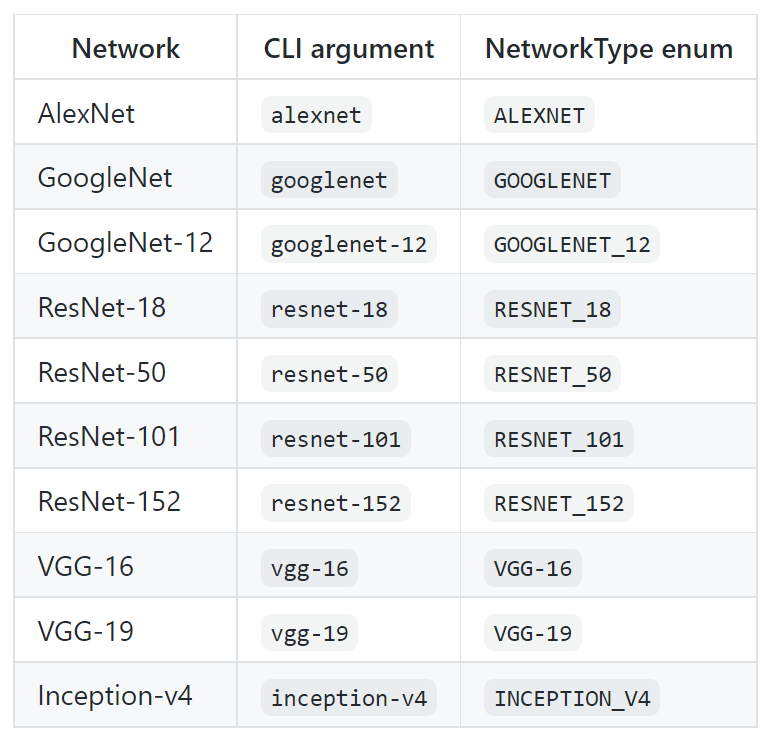

### <font color='darkcyan'>이미지 가져오기</font>

In [25]:
img = jetson.utils.loadImage('/home/jetson/works/jetson-inference/build/aarch64/bin/images/strawberry_0.jpg')

### <font color='darkcyan'>예측</font>

In [26]:
net = jetson.inference.imageNet('resnet-18')
class_idx, confidence = net.Classify(img)
class_desc = net.GetClassDesc(class_idx)
print(f' idx: {class_idx}\n name: {class_desc}\n conf: {confidence}')

 idx: 949
 name: strawberry
 conf: 0.99267578125


### <font color='darkcyan'>이미지 출력</font>

In [27]:
image = jetson.utils.cudaToNumpy(img)  #cudaImage 형식을 numpy로 변환
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #OpenCV에서 사용하는 BGR 형태의 numpy로 변환
image = bgr8_to_jpeg(image)  #numpy를 이미지로 변환
widget = widgets.Image(format='jpeg', width=300, height=300)
display(widget)
widget.value = image

Image(value=b'', format='jpeg', height='300', width='300')

---
<br>

# <font color='crimson'>6. 카메라를 활용한 분류</font>

### <font color='darkcyan'>모듈 가져오기</font>

In [28]:
import ipywidgets.widgets as widgets
from jetbotmini import bgr8_to_jpeg
from jetbotmini import Camera

import jetson.inference
import jetson.utils

import cv2

### <font color='darkcyan'>모델 가져오기</font>

In [29]:
net = jetson.inference.imageNet('googlenet')

### <font color='darkcyan'>카메라 설정</font>

In [32]:
camera = Camera.instance(width=300, height=300, fps=1)

### <font color='darkcyan'>이미지 출력 위젯 생성</font>

In [33]:
widget = widgets.Image(format='jpeg', width=300, height=300)
display(widget)

Image(value=b'', format='jpeg', height='300', width='300')

### <font color='darkcyan'>예측 및 출력</font>

In [34]:
while 1:
    try:
        frame = camera.value
        img_cuda = jetson.utils.cudaFromNumpy(frame)
        class_idx, confidence = net.Classify(img_cuda)
        class_desc = net.GetClassDesc(class_idx)
        cv2.putText(frame, f'{class_desc}, {confidence}', (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 1)
        widget.value = bgr8_to_jpeg(frame)
    except KeyboardInterrupt:
        break

camera.stop()
del camera